# Machine Learning 2 - Neural Networks

In this lab, we will use simple Neural Networks to classify the images from the simplified CIFAR-10 dataset. We will compare our results with those obtained with Decision Trees and Random Forests.

Lab objectives
----
* Classification with neural networks
* Influence of hidden layers and of the selected features on the classifier results

In [90]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image
        
dataset = CIFAR10('./CIFAR10/')

Pre-loading training data
Pre-loading test data


We will use the *[Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)* implementation from scikit-learn, which is only available since version 0.18. You can check which version of scikit-learn is installed by executing this :

In [91]:
import sklearn
print(sklearn.__version__)

1.0.2


If you have version 0.17 or older, please update your scikit-learn installation (for instance, with the command *pip install scikit-learn==0.19.1* in the terminal or Anaconda prompt)

## Build a simple neural network

* Using the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from scikit-learn, create a neural network with a single hidden layer.
* Train this network on the CIFAR dataset.
* Using cross-validation, try to find the best possible parameters.

In [3]:
# Infinite hyper-parameters to play with:
# - Network architecture (how many layers, how many neurons)
# - Activation functions
# - Optimization algo
# - Regularization param
# - Learning rate
# - Stopping criteria


In [92]:
from sklearn.neural_network import MLPClassifier


In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

kf = StratifiedKFold(5)

cms = []
accs = []

for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=0.01, verbose = False, early_stopping = True)
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]
    pred = clf.predict(test_x)
    
    cms.append(confusion_matrix(test_y, pred))
    accs.append(accuracy_score(test_y,pred))
    
    print(accuracy_score(test_y,pred))

0.7913333333333333
0.793
0.7863333333333333
0.7916666666666666
0.7853333333333333


In [13]:
for cm,acc in zip(cms,accs):
    print("---")
    print(cm)
    print(f'Accuracy={acc:.2f}')

---
[[790 155  55]
 [ 95 751 154]
 [ 41 126 833]]
Accuracy=0.79
---
[[805 129  66]
 [134 686 180]
 [ 34  78 888]]
Accuracy=0.79
---
[[808 114  78]
 [148 675 177]
 [ 30  94 876]]
Accuracy=0.79
---
[[809 140  51]
 [137 738 125]
 [ 45 127 828]]
Accuracy=0.79
---
[[866  88  46]
 [182 674 144]
 [ 68 116 816]]
Accuracy=0.79


In [6]:
print(dataset.labels)

['Airplane', 'Bird', 'Horse']


In [14]:
print(clf.coefs_[0].shape)
print(clf.coefs_[1].shape)

(256, 100)
(100, 3)


In [22]:
import matplotlib.pyplot as plt
import numpy as np

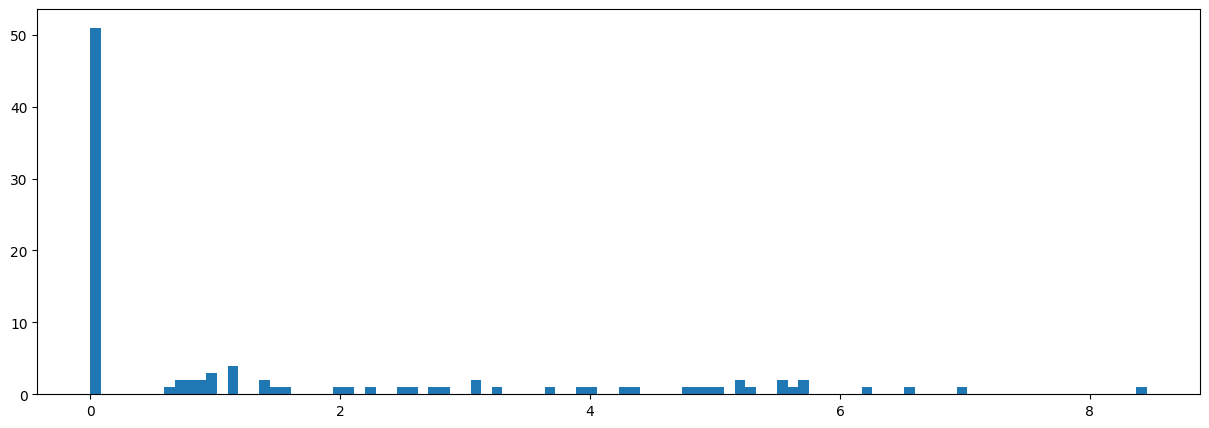

In [15]:
plt.figure(figsize=(15,5))
plt.hist(np.abs(clf.coefs_[1]).max(axis=1), bins=100)
plt.show()

# for each neuron of the hidden layer i take the max value to one of the 3 output neuron
# for neuron where the max val is near 0 the neuron is not used by the network

In [10]:
print((np.abs(clf.coefs_[1]).max(axis=1)>1).sum())

27


In [16]:
print(clf.coefs_[1].argmax(axis=0))        # Neurons contributing the most positively to the different outputs
print(clf.coefs_[1].max(axis=0))

print(clf.coefs_[1].argmin(axis=0))        # Neurons contributing the most negatively to the different outputs
print(clf.coefs_[1].min(axis=0))

[63 24  0]
[5.45580095 3.11123345 4.3557851 ]
[ 7  6 63]
[-4.8641871  -5.61710367 -8.45709217]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0 4.782081827581592


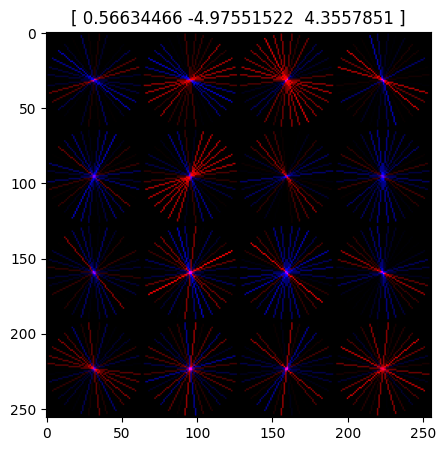

In [31]:
# Connexions between inputs and hidden
# by tracking the input weight of the different input we can re create the HoG and see 
# which features in the HoG contribute the most to the prediction (negatively or positviley)


# can help to see if the model is able to correctly find interesting features

from lab_tools import get_hog_image
%matplotlib inline

i = 0
hog = get_hog_image(clf.coefs_[0][:,i].reshape(4,4,-1), output_size = 256)
print(hog.min(), hog.max())
plt.figure(figsize=(15,5))
plt.imshow(hog, cmap='BuGn_r')
plt.title(clf.coefs_[1][i])
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'hidden_layer_sizes': [(20,),(30,),(50,),(70,),(100,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
    
}

mlp = MLPClassifier(early_stopping = True)


grid_search = GridSearchCV(estimator=mlp, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.0s
[C

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   2.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adap

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.4s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adapti

[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.1s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.1s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=cons

[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   8.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   5.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_r

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  18.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_r

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.7s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.9s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.5s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.0s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.7s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.9s
[CV] END activation=identity, hidden_layer_s

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.0s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.4s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.0s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.5s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.7s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.9s
[CV] END activation=identity, hidden_layer_s

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.0s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.3s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.6s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.9s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.8s
[CV] END activation=identity, hidden_layer_s

[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.5s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.0s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  12.6s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  10.6s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.5s
[CV] END activation=identity, hidden_layer_si

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.0s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.2s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.2s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.1s
[CV] END activation=identity, hidde

[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.6s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.5s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.5s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   3.5s
[CV] END activation=logistic, hidden_layer_si

[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   3.4s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.4s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   3.3s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   6.6s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_laye

[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer

[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.7s
[CV] END activation=logistic, hidden_l

[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.7s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_

[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learni

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.7s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   3.2s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.4s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.1s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adap

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  13.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   3.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adap

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  10.2s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   9.7s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   4.4s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=cons

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  11.3s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.6s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   3.7s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.2s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adap

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  20.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  16.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  10.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  12.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_ra

In [6]:
# Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 
# 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}

best_mlp = grid_search.best_estimator_
best_mlp.fit(dataset.train['hog'], dataset.train['labels'])


test_accuracy = best_mlp.score(dataset.test['hog'], dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)


Test Accuracy with Best Model: 0.7976666666666666


In [7]:
print(best_mlp.coefs_[0].shape)
print(best_mlp.coefs_[1].shape)

(256, 100)
(100, 3)


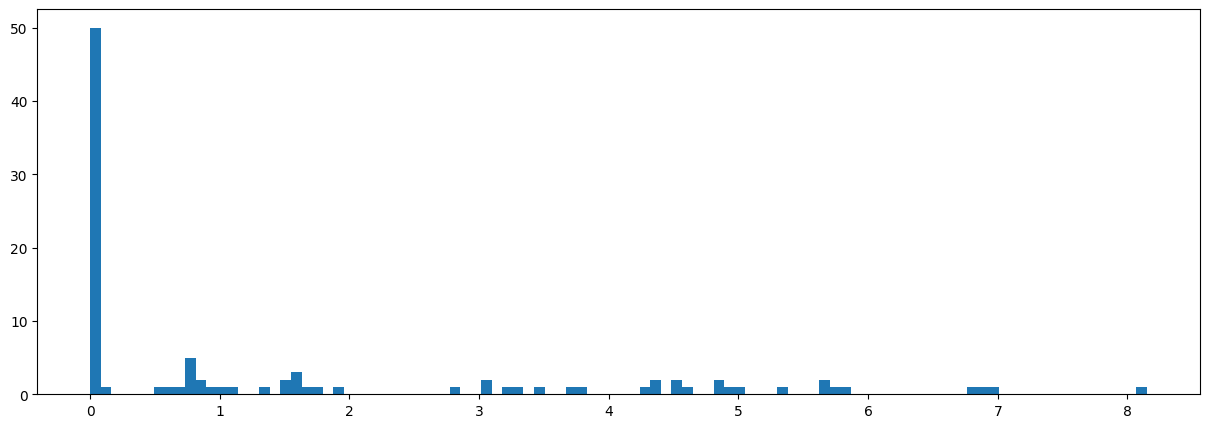

In [9]:
plt.figure(figsize=(15,5))
plt.hist(np.abs(best_mlp.coefs_[1]).max(axis=1), bins=100)
plt.show()

In [10]:
print(best_mlp.coefs_[1].argmax(axis=0))        # Neurons contributing the most positively to the different outputs
print(best_mlp.coefs_[1].max(axis=0))

print(best_mlp.coefs_[1].argmin(axis=0))        # Neurons contributing the most negatively to the different outputs
print(best_mlp.coefs_[1].min(axis=0))

[30 96 61]
[5.71328912 3.38964336 4.62054135]
[47 69 48]
[-4.82708318 -5.83879977 -8.15117022]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0 4.920175707701228


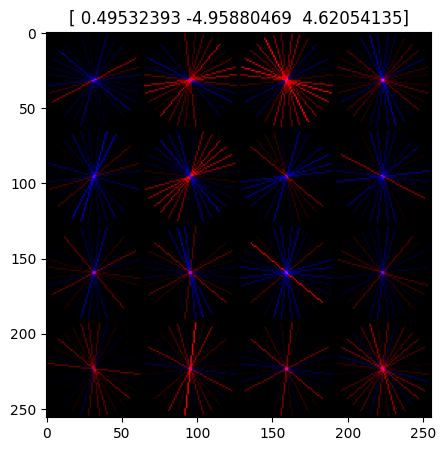

In [32]:
from lab_tools import get_hog_image
%matplotlib inline

i = 61
hog = get_hog_image(best_mlp.coefs_[0][:,i].reshape(4,4,-1), output_size = 256)
print(hog.min(), hog.max())
plt.figure(figsize=(15,5))
plt.imshow(hog)
plt.title(best_mlp.coefs_[1][i])
plt.show()

## Normalized [-1,1]

In [30]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_11_train = scaler.fit_transform(dataset.train['hog'])
normalized_11_test = scaler.fit_transform(dataset.test['hog'])

In [31]:
print(normalized_11_train.shape)
print(normalized_11_train.max(axis=0).max())
print(normalized_11_train.min(axis=0).min())

(15000, 256)
1.0
-1.0


In [32]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'hidden_layer_sizes': [(20,),(30,),(50,),(70,),(100,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
    
}

mlp = MLPClassifier(early_stopping = True)


grid_search = GridSearchCV(estimator=mlp, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(normalized_11_train, dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_mlp = grid_search.best_estimator_
best_mlp.fit(normalized_11_train, dataset.train['labels'])


test_accuracy = best_mlp.score(normalized_11_test, dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.7s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.6s
[C

[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=consta

[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_

[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(70,), learni

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.7s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.6s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.9s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.8s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adap

[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.1s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_r

[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   3.0s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.7s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.9s
[CV] END activation=identity, hidden_la

[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.9s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.0s
[CV] END activation=identity, hidden_layer_s

[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.8s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.7s
[CV] END activation=identity, hidden_layer_si

[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.3s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.8s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.8s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=

[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.4s
[CV] END activation=logistic, 

[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   2.3s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   2.1s
[CV] END activation=logistic, h

[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   2.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   4.9s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   5.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   5.4s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.4s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.9s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.8s
[CV] END activation=logistic, hidden_

[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.0s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.7s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   5.8s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.4s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  11.5s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  15.7s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  12.7s
[CV] END activation=logistic, hidden_layer_s

[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  15.6s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  13.4s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  13.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  13.1s
[CV] END activation=tanh, hidden_layer

[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   4.8s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   5.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=c

[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   4.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constan

[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   4.5s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   7.6s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   4.9s
[CV] END activation=tanh, hidden_layer_sizes=(70,), lea

[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   4.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(100,)

In [ ]:
#Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (70,), 'learning_rate': 'adaptive', 
#                   'learning_rate_init': 0.01, 'solver': 'sgd'}
# Best Score: 0.7517333333333335
# Test Accuracy with Best Model: 0.7636666666666667

## PCA 

In [33]:
from sklearn.decomposition import PCA

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_01_train = scaler.fit_transform(dataset.train['hog'])
normalized_01_test = scaler.fit_transform(dataset.test['hog'])

In [36]:
print(normalized_11_train.shape)
print(normalized_11_train.max(axis=0).max())
print(normalized_11_train.min(axis=0).min())

(15000, 256)
1.0
-1.0


In [37]:
pca = PCA(n_components=0.80)

PCA_train = pca.fit_transform(normalized_01_train)
PCA_test = pca.transform(normalized_01_test)

In [38]:
print(PCA_train.shape)
print(PCA_train.max(axis=0).max())
print(PCA_train.min(axis=0).min())
print(PCA_test.shape)
print(PCA_test.max(axis=0).max())
print(PCA_test.min(axis=0).min())

(15000, 116)
1.1091062857756568
-0.7826208610830095
(3000, 116)
1.2691781141414178
-0.9675240988040121


In [39]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'hidden_layer_sizes': [(20,),(30,),(50,),(70,),(100,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
    
}

mlp = MLPClassifier(early_stopping = True)


grid_search = GridSearchCV(estimator=mlp, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(PCA_train, dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_mlp = grid_search.best_estimator_
best_mlp.fit(PCA_train, dataset.train['labels'])


test_accuracy = best_mlp.score(PCA_test, dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.6s
[C

[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.1s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=consta

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.7s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.7s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adapti

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   8.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   6.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=const

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.8s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adapti

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  11.6s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.7s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  11.4s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adapt

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  13.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  11.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  12.0s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_ra

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   6.3s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.4s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.2s
[CV] END activation=identity, hidden_layer_

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.5s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.4s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   3.6s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.3s
[CV] END activation=identity, hidden_layer

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.2s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.7s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.9s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.7s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.2s
[CV] END activation=identity, hidden_layer_

[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.5s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.5s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.0s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.6s
[CV] END activation=identity, hidden_layer_si

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.6s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.1s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.9s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.0s
[CV] END activation=identity, hidden_layer_s

[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.2s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.5s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.3s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.6s
[CV] END activation=logistic, hidden_l

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.2s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.5s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.2s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.2s
[CV] END activation=logistic, hidden_layer_si

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.6s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.7s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.2s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.4s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.1s
[CV] END activation=logistic, hidden_layer_si

[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.5s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.6s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.6s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.9s
[CV] END activation=logistic, hidden_la

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  12.0s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.3s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.6s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.9s
[CV] END activation=logistic, hidden_layer_si

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  15.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.6s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.5s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.4s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.8s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   9.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.7s
[CV] END activation=tanh, hidden_layer

[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   5.9s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.3s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.4s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=c

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.7s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.3s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.9s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.9s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.5s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.2s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=adap

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.7s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.5s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.5s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adap

[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.0s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.2s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=consta

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  16.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  14.7s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   4.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   4.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_r

In [ ]:
# Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (70,), 'learning_rate': 'constant', 
#                   'learning_rate_init': 0.001, 'solver': 'adam'}
# Best Score: 0.7998
# Test Accuracy with Best Model: 0.8076666666666666

## PCA normalized [-1,1]

In [40]:
scaler = MinMaxScaler(feature_range=(-1, 1))
PCA_11_train = scaler.fit_transform(PCA_train)
PCA_11_test = scaler.fit_transform(PCA_test)

In [41]:
print(PCA_11_train.shape)
print(PCA_11_train.max(axis=0).max())
print(PCA_11_train.min(axis=0).min())

(15000, 116)
1.0000000000000004
-1.0


In [42]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'hidden_layer_sizes': [(20,),(30,),(50,),(70,),(100,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
    
}

mlp = MLPClassifier(early_stopping = True)


grid_search = GridSearchCV(estimator=mlp, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(PCA_11_train, dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_mlp = grid_search.best_estimator_
best_mlp.fit(PCA_11_train, dataset.train['labels'])


test_accuracy = best_mlp.score(PCA_11_test, dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   4.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.0s
[C

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adap

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.7s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.2s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adapti

[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.8s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=cons

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  10.9s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  10.0s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=(70,), learning_rate=adap

[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.9s
[CV] END activation=identity, hidden_layer_sizes=(20,), learning_r

[CV] END activation=identity, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.0s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.1s
[CV] END activation=identity, hidden_la

[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.2s
[CV] END activation=identity, hidden_layer_s

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.5s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   3.6s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.5s
[CV] END activation=identity, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_

[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.7s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.7s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.6s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   2.7s
[CV] END activation=identity, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   3.3s
[CV] END activation=identity, hidden_layer_si

[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.3s
[CV] END activation=identity, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.6s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   4.0s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.3s
[CV] END activation=logistic, hidden_l

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.7s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.5s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.1s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.0s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.3s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.4s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   2.7s
[CV] END activation=logistic, hidden_layer_s

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   5.6s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   5.9s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.4s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_s

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.4s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.7s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.2s
[CV] END activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   3.9s
[CV] END activation=logistic, hidden_layer_

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  10.3s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.6s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.4s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.3s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.6s
[CV] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.9s
[CV] END activation=logistic, hidden_layer_

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.2s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.5s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.3s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.7s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.7s
[CV] END activation=logistic, hidden_layer_sizes=(70,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.1s
[CV] END activation=logistic, hidden_layer_s

[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.0s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.2s
[CV] END activation=tanh, hidden_layer

[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   4.4s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(30,), learning_rate=c

[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   4.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constan

[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(70,), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(70,), lea

[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   3.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   4.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   2.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,)

In [ ]:
# Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 
#                   'learning_rate_init': 0.001, 'solver': 'adam'}
# Best Score: 0.7854666666666666
# Test Accuracy with Best Model: 0.7356666666666667

### Hidden layer neurons inspection

In [93]:
from lab_tools import get_hog_image
%matplotlib inline

def inspect_mlp(mlp,ax,title):
    
    ax.hist(np.abs(mlp.coefs_[1]).max(axis=1), bins=100)
    ax.set_title(title)


In [94]:
# Original
original_mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                             learning_rate_init=0.01, learning_rate='constant', max_iter=1000)
original_mlp.fit(dataset.train['hog'], dataset.train['labels'])

# Normalized
normalized_mlp = MLPClassifier(hidden_layer_sizes=(70,), activation='relu', solver='sgd',
                             learning_rate_init=0.01, learning_rate='adaptive', max_iter=1000)
normalized_mlp.fit(normalized_11_train, dataset.train['labels'])

# PCA
PCA_mlp = MLPClassifier(hidden_layer_sizes=(70,), activation='relu', solver='adam',
                             learning_rate_init=0.001, learning_rate='constant', max_iter=1000)
PCA_mlp.fit(PCA_train, dataset.train['labels'])

# PCA normalized
PCA_11_mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                             learning_rate_init=0.001, learning_rate='adaptive', max_iter=1000)
PCA_11_mlp.fit(PCA_11_train, dataset.train['labels'])



MLPClassifier(learning_rate='adaptive', max_iter=1000)

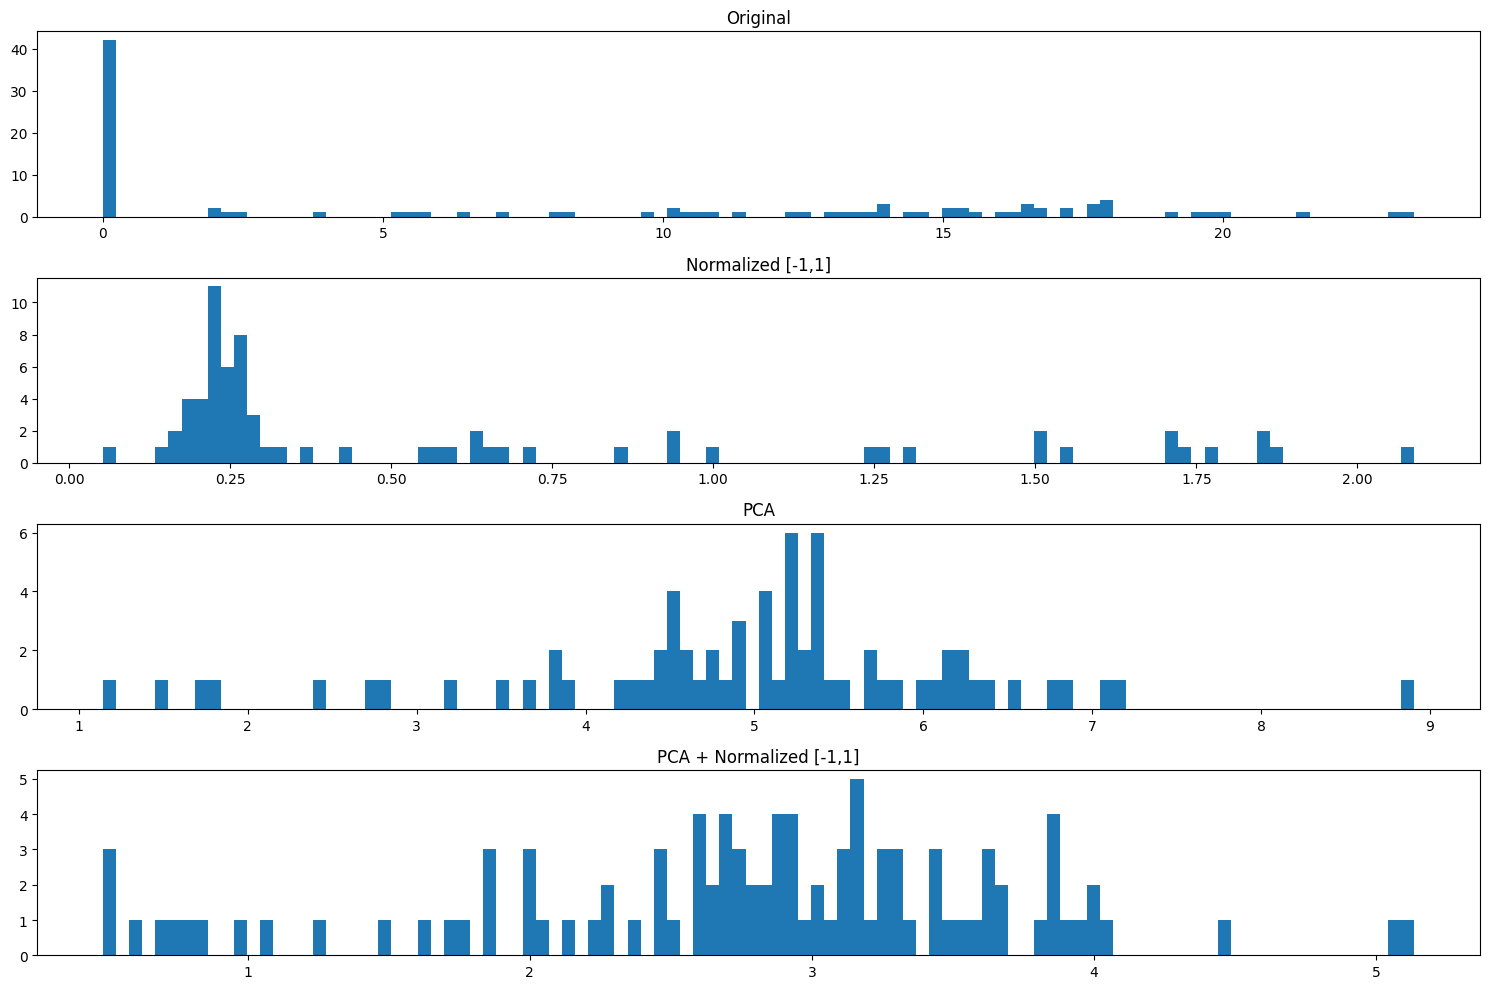

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10))


inspect_mlp(original_mlp, ax1, 'Original')
inspect_mlp(normalized_mlp, ax2, 'Normalized [-1,1]')
inspect_mlp(PCA_mlp, ax3, 'PCA')
inspect_mlp(PCA_11_mlp, ax4, 'PCA + Normalized [-1,1]')
plt.tight_layout()
plt.show()

In [100]:
def plot_hog(mlp, ax, class_i, title):

    #print(mlp.coefs_[1].argmax(axis=0))        # Neurons contributing the most positively to the different outputs
    #print(mlp.coefs_[1].max(axis=0))

    #print(mlp.coefs_[1].argmin(axis=0))        # Neurons contributing the most negatively to the different outputs
    #print(mlp.coefs_[1].min(axis=0))
    
    i = mlp.coefs_[1].argmax(axis=0)[class_i]
    #print(i)
    hog = get_hog_image(mlp.coefs_[0][:,i].reshape(4,4,-1), output_size = 256)
    #print(hog.min(), hog.max())
    ax.imshow(hog)
    ax.set_title(title)
    #plt.title(mlp.coefs_[1][i])
    
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


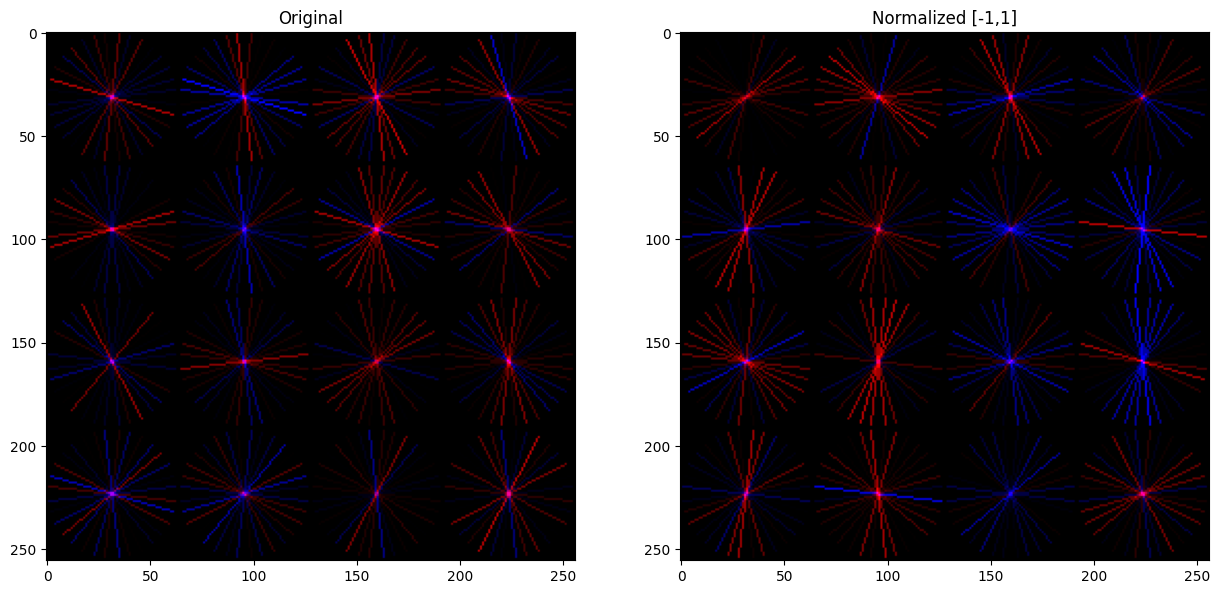

In [102]:
class_i = 1

fig, axs = plt.subplots(1,2, figsize=(15,15))
plot_hog(original_mlp, axs[0], class_i, 'Original')
plot_hog(normalized_mlp, axs[1], class_i, 'Normalized [-1,1]')
plt.show()

## Add hidden layers to the network.

Try to change the structure of the network by adding hidden layers. Using cross-validation, try to find the best architecture for your network.

In [38]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

kf = StratifiedKFold(5)

cms = []
accs = []

for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.01, verbose = False, early_stopping = True)
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]
    pred = clf.predict(test_x)
    
    cms.append(confusion_matrix(test_y, pred))
    accs.append(accuracy_score(test_y,pred))
    
    print(accuracy_score(test_y,pred))

0.7806666666666666
0.7983333333333333
0.7823333333333333
0.7866666666666666
0.7926666666666666


In [41]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'hidden_layer_sizes': [(30,30), (30,50), (30,70), (30,100),
                           (50,30), (50,50), (50,70), (50,100),
                           (70,30), (70,50), (70,70), (70,100),
                           (100,30),(100,50),(100,70),(100,100),
                           (30,30,30)
                          ],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
    
}

mlp = MLPClassifier(early_stopping = True)


grid_search = GridSearchCV(estimator=mlp, param_grid=parameter_space, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)




Fitting 3 folds for each of 1224 candidates, totalling 3672 fits
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam;

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 3

[CV] END activation=relu, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.8s
[CV] END activation=relu, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(30, 

[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.8s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   6.7s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.3s
[CV] END activation=relu, hidden_layer_

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  17.7s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.8s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   9.6s
[CV] END activation=relu, hidden_layer_siz

[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 30

[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.0s
[CV] END activation=relu, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(5

[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  14.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  10.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  13.4s
[CV] END activation=relu, hidden_layer_siz

[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  10.0s
[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  10.0s
[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  17.0s
[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   3.0s
[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  14.2s
[CV] END activation=relu, hidden_layer_sizes=(70, 30

[CV] END activation=relu, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  16.6s
[CV] END activation=relu, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  15.4s
[CV] END activation=relu, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   6.8s
[CV] END activation=relu, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   4.4s
[CV] END activation=relu, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.8s
[CV] END activation=relu, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(7

[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   8.6s
[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   5.3s
[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes

[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   3.7s
[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   8.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  24.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  16.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   6.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.3s
[CV] END activation=relu, hidden_layer_siz

[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.7s
[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   4.6s
[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   3.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=  11.2s
[CV] END activation=relu, hidden_layer_sizes=

[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   9.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   9.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=  15.7s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   6.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   9.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.8s
[CV] END activation=relu, 

[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.7s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   3.2s
[CV] 

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  15.6s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  15.8s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.3s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  10.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  15.6s
[CV] END activation=relu, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.8s
[CV] END activation=iden

[CV] END activation=identity, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.1s
[CV] END activation=identity, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   9.8s
[CV] END activation=identity, hidden_layer_sizes=(30, 50), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.3s
[CV] END activation=identity, hidden_layer_sizes=(30, 50), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(30, 50), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=(30, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   8.0s
[CV] END activation=identity, hidden_layer_sizes=(30, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.8s
[CV] END activation

[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   2.5s
[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  12.5s
[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(30, 70), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.0s
[CV] END activation=i

[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   0.9s
[CV] END activat

[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   4.2s
[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   3.3s
[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.5s
[CV] END activation=identity, hidden_layer_sizes=(50, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   4.6s
[CV] END activati

[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.9s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.4s
[CV

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  16.5s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  12.8s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.9s
[CV] END activation=identity, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.6s
[CV] END activation=id

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  17.0s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  14.3s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  16.6s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  10.8s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  14.6s
[CV] END activation=identity, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.5s
[CV] END activation=ide

[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   9.4s
[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   9.2s
[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.4s
[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.3s
[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  15.3s
[CV] END activation=identity, hidden_layer_sizes=(50, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.0s
[CV] END activati

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  16.8s
[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  15.3s
[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  13.8s
[CV] END activation=identity, hidden_layer_sizes=(70, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.9s
[CV] END activation=iden

[CV] END activation=identity, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  13.4s
[CV] END activation=identity, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.7s
[CV] END activation=identity, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.8s
[CV] END activation=identity, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.5s
[CV] END activation=identity, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.4s
[CV] END activation=identity, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  12.8s
[CV] END activation=

[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   4.2s
[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   6.7s
[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  17.2s
[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=identity, hidden_layer_sizes=(70, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.0s
[CV] END act

[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.0s
[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   2.9s
[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.0s
[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.1s
[CV] END activation=identity, hidden_layer_sizes=(100, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   3.0s
[CV] END activat

[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.5s
[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   9.5s
[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   7.8s
[CV] END activation=identity, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.9s
[CV] END activati

[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   3.4s
[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.0s
[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   7.4s
[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.0s
[CV] END activation=identity, hidden_layer_sizes=(100, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.7s
[CV] EN

[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   3.1s
[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total ti

[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.6s
[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd;

[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END 

[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   4.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   6.4s
[CV] END ac

[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   4.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.8s
[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   5.5s
[CV] END activation=logistic, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activati

[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   6.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   5.6s
[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   9.5s
[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.9s
[CV] END activation=logistic, hidden_layer_sizes=(30, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   7.7s
[CV] END activat

[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.7s
[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.1s
[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.5s
[CV] END activation=logistic, hidden_layer_sizes=(50, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   8.4s
[CV] END activation=logi

[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.0s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.8s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   6.8s
[CV] END activation=logistic, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   7.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   5.8s
[CV] END activation=logistic, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   6.6s
[CV] END activation=logistic, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.9s
[CV] END activation=

[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=  12.0s
[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.6s
[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.1s
[CV] END activation=logistic, hidden_layer_sizes=(50, 100), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.5s
[CV] END act

[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.5s
[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.6s
[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   4.7s
[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(70, 30), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   5.3s
[CV] END activation=log

[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   7.8s
[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   2.8s
[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   5.1s
[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.5s
[CV] END activation=logistic, hidden_layer_sizes=(70, 50), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.4s
[CV] END activation=logi

[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   5.7s
[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   6.7s
[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(70, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.4s
[CV] END 

[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   3.0s
[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.9s
[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.3s
[CV] END activation=logistic, hidden_layer_sizes=(70, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.2s


[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   3.4s
[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(100, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   3.0s
[C

[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   8.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   3.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   2.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   1.4s
[CV

[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   2.0s
[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   7.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=  12.5s
[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(100, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   9.3s
[CV] EN

[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   9.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   7.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.6s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   8.5s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.9s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   5.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   4.1s
[CV]

[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   3.8s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   4.5s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.0s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   2.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   4.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  

[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.9s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   8.6s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.9s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  11.3s
[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.9s
[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=(30, 50), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=   5.7s
[CV] END activation=tanh, hidden_layer_sizes=(30, 5

[CV] END activation=tanh, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   3.2s
[CV] END activation=tanh, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.2s
[CV] END activation=tanh, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  10.4s
[CV] END activation=tanh, hidden_layer_sizes=(30, 70), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  11.8s
[CV] END activation=tanh, hidden_layer_sizes=(30, 100), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   4.1s
[CV] END activation=tanh, hidden_layer_sizes=(30,

[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   3.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   8.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  14.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50, 30), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=

[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   4.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   2.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 5

[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   5.6s
[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   4.9s
[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(50, 70), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   2.2s
[CV] END activation=tanh, hidden_layer_siz

[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   3.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.8s
[CV] END activation=tanh, 

[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=adam; total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   5.5s
[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.01, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   2.8s
[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   2.4s
[CV] END activation=tanh, hidden_layer_sizes=(70, 30), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   4.0s
[CV] END activation=tanh, hidden_laye

[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=adam; total time=   2.1s
[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   3.6s
[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   5.1s
[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=invscaling, learning_rate_init=0.05, solver=sgd; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   5.2s
[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   3.9s
[CV] END activation=tanh, hidden_layer_sizes=(70, 50), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   2.3s
[CV] END activation=tanh, hidden_layer_s

[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   3.3s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  20.7s


/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  23.7s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=  22.3s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   5.5s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=adam; total time=   3.1s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  12.0s
[CV] END activation=tanh, hidden_layer_sizes=(70, 70), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  10.9s
[CV] END activation=tanh, hidden_layer_sizes=(70, 

[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  13.3s
[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  25.3s
[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   3.7s
[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   4.3s
[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  21.2s
[CV] END activation=tanh, hidden_layer_sizes=(70, 100), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  23.5s
[CV] END activation=tanh, hidden_layer_sizes=

[CV] END activation=tanh, hidden_layer_sizes=(100, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  12.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  10.9s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   7.2s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   7.8s
[CV] END activation=tanh, hidden_layer_s

[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=  12.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   3.8s
[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   5.0s
[CV] END activation=tanh, hidden_layer_sizes=(100, 70), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.2s
[CV] END activation=tanh, hidden_layer_size

[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   4.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.01, solver=sgd; total time=   3.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   3.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=adam; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   3.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   5.2s
[CV] END activation=tanh, hidden_layer

[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   2.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   5.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=constant, learning_rate_init=0.05, solver=sgd; total time=   4.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=adam; total time=   1.8s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=invscaling, learning_rate_init=0.001, solver=sgd; total time=   0.8s
[CV] END act

/Users/cyrilvanleer/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  12.4s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=  10.5s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   9.4s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   7.5s
Best Parameters: {'activ

In [14]:
# Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 
#                   'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}

best_mlp = MLPClassifier(activation='relu', hidden_layer_sizes= (100, 100), 
                         learning_rate= 'constant', learning_rate_init= 0.01, solver= 'adam')
best_mlp.fit(dataset.train['hog'], dataset.train['labels'])


test_accuracy = best_mlp.score(dataset.test['hog'], dataset.test['labels'])
print("Test Accuracy with Best Model:", test_accuracy)

Test Accuracy with Best Model: 0.791


In [17]:
print(best_mlp.coefs_[0].shape)
print(best_mlp.coefs_[1].shape)
print(best_mlp.coefs_[2].shape)

(256, 100)
(100, 100)
(100, 3)


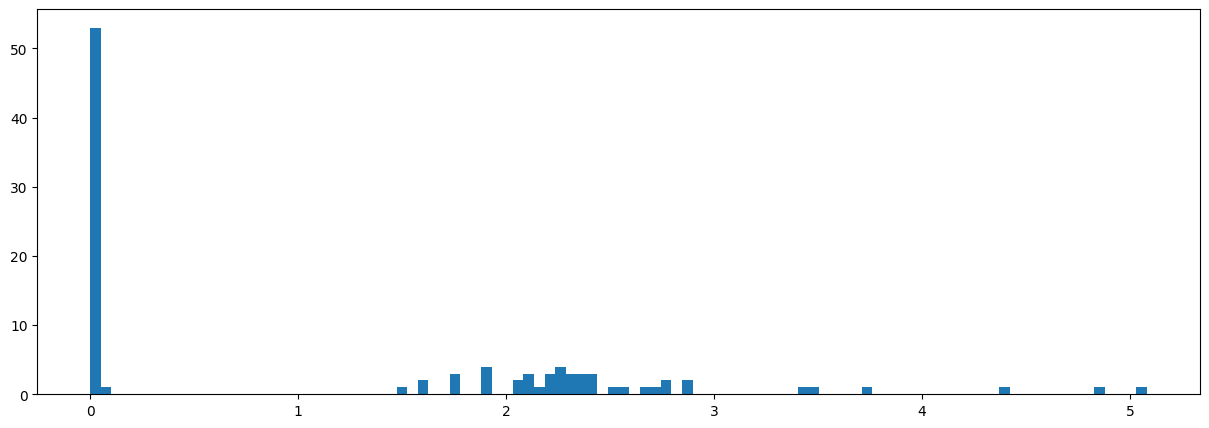

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))
plt.hist(np.abs(best_mlp.coefs_[2]).max(axis=1), bins=100)
plt.show()

# for each neuron of the hidden layer i take the max value to one of the 3 output neuron
# for neuron where the max val is near 0 the neuron is not used by the network